# Pandas Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Use pandas to create a Series from the following data:

- Name the variable that holds the series fruits.

In [2]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", 
                  "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", 
                  "gooseberry", "papaya"])

fruits

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

 - Run .describe() on the series to see what describe returns for a series of strings.

In [21]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

 - Run the code necessary to produce only the unique fruit names.

In [557]:
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

- Determine how many times each value occurs in the series.

In [34]:
fruits.value_counts()

kiwi                4
mango               2
pineapple           1
blueberry           1
tomato              1
strawberry          1
watermelon          1
gooseberry          1
papaya              1
blackberry          1
gala apple          1
honeydew            1
honeycrisp apple    1
dtype: int64

- Determine the most frequently occurring fruit name from the series.

In [6]:
# My first attempt was to use the .value_counts method with the .head method 
# to return the most frequently occurring fruit:

fruits.value_counts().head(1)

#After the demo, I learned more about the nlargest method and show that approach here:
fruits.value_counts().nlargest(n=1, keep='all')

# NOTE: the keep='all' condition will return multiple values if the 
# most frequently occuring fruit comparison is shared by more than row. 
# However, Kiwi is the most frequent fruit solely, so only one row row is returned

kiwi    4
dtype: int64

- Determine the least frequently occurring fruit name from the series.

In [12]:
# Intially used the same approach as I did for most frequently ocurring fruit: 

fruits.value_counts().tail(1)

# In this instance, I only returned one value, even though there are several fruits that only occur once, 
# so the nsmallest method would have been more beneficial here:

fruits.value_counts().nsmallest(n=1, keep='all')

# I could modify keep='all' to keep'first' for the first value occuring based on the index. 
# Or last to achieve the last. Note that the last in this method returns pineapple. 
# The last in my first attempt returned honeycrisp apple.

tomato              1
blackberry          1
gala apple          1
gooseberry          1
blueberry           1
papaya              1
watermelon          1
honeycrisp apple    1
strawberry          1
honeydew            1
pineapple           1
dtype: int64

- Write the code to get the longest string from the fruits series.

In [15]:
# Using the max function with the key=len to achieve this works the best in my opinion:

max(fruits, key=len) 

'honeycrisp apple'

- Find the fruit(s) with 5 or more letters in the name.

In [16]:
# Here I set a new variable for a new list with string lengths >= 5 and utilizing the lambda function:

fruits_with_5 = fruits[fruits.apply(lambda x: len(str(x)) >= 5)]
fruits_with_5

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

- Capitalize all the fruit strings in the series.

In [17]:
# Initial attempt:
fruits.str.capitalize()

#In demo I was reminded that .title would also work and would actually 
# capitalize the first letters fruits with more than one word:
fruits.str.title()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala Apple
5     Honeycrisp Apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

- Count the letter "a" in all the fruits (use string vectorization)

In [18]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

- Output the number of vowels in each and every fruit.

In [23]:
# My initial attempt started with creating a variable to hold the list of vowels:

vowels = list('aeiou')
vowels
# However, my inital code below was not syntactically correct python resulting in an error "unhashable type list"
#so I was unable to achieve the desired output
#fruits.str.count([vowels]) --> bad code

# what would have worked with this approach would have bene to def a function with a loop and the let method:
def count_vowels(fruit):
    return len([let for let in fruit.lower() if let in vowels])

fruits.apply(count_vowels)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [24]:
# An approach from demo that I think I prefer would be to use regex:

vowel_counts=fruits.str.count(r'[aeiou]')
vowel_counts

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

- Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

In [566]:
# I used the lambda function to loop over fruits for the letter 'o' with a comparison operator 
# to return fruits with more than 1 letter 'o':

fruits[fruits.apply(lambda fruit: fruit.count('o') > 1)]

6         tomato
15    gooseberry
dtype: object

- Write the code to get only the fruits containing "berry" in the name

In [567]:
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

- Write the code to get only the fruits containing "apple" in the name

In [568]:
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

- Which fruit has the highest amount of vowels?

In [29]:
max_vowels = vowel_counts = fruits.str.count(r'[aeiou]').max()
max_vowels

#to take this further and return the fruit with 5 vowels I need to create a boolean series:

bool_fruits = fruits.str.count(r'[aeiou]') == max_vowels
bool_fruits

#and then pass that boolean series thru fruits to return the value that corresponds with max_vowels:
fruits[bool_fruits]

5    honeycrisp apple
dtype: object

## 2. Use pandas to create a Series from the following data:

In [30]:
# use pandas to create my series and set it to the variable money: 

money = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', 
 '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', 
 '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', 
 '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

In [31]:
money

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

- What is the data type of the series?

In [172]:
money.dtype

dtype('O')

- Use series operations to convert the series to a numeric data type.

In [32]:
#Here I chain functions together to convert the data to float dtype:

money_series = money.str.replace('$','').str.replace(',','').astype('float')

In [33]:
#checking conversion to float:

money_series.dtype

dtype('float64')

- What is the maximum value? The minimum?

In [34]:
#simple use of the max and min functions:

money_series.max(), money_series.min()

(4789988.17, 278.6)

- Bin the data into 4 equally sized intervals and show how many values fall into each bin.

In [186]:
pd.cut(money_series, bins=4).value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

- Plot a histogram of the data. Be sure to include a title and axis labels.

Text(0, 0.5, 'Frequency')

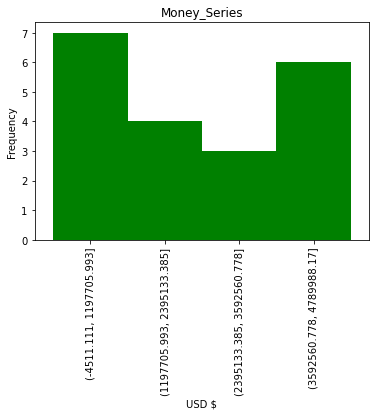

In [49]:
money_series.value_counts(bins=4).sort_index(ascending=True).plot.bar(color='green', width=1)
plt.title('Money_Series')
plt.xlabel('USD $')
plt.ylabel('Frequency')

## 3. Use pandas to create a Series from the following exam scores:

In [50]:
#Create series and set it to the variable exam_scores:

exam_scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [192]:
#check the data type to make sure it is int:
exam_scores.dtype

dtype('int64')

- What is the minimum exam score? The max, mean, median?

In [51]:
# The describe function will return all of this data:
exam_scores.describe()

count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64

- Plot a histogram of the scores.

Text(0, 0.5, 'Number of Students')

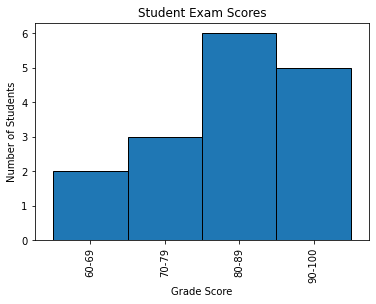

In [56]:
#Set bin edges and bin labels:

bin_edges = [50, 60, 70, 80, 90]
bin_labels = ['60-69', '70-79', '80-89', '90-100']

# Use the pandas cut function to bin the data
pd.cut(exam_scores, bins=bin_edges, labels=bin_labels, include_lowest=True).value_counts().sort_index().plot.bar(ec='k', width=1)

plt.title('Student Exam Scores')
plt.xlabel('Grade Score')
plt.ylabel('Number of Students')

- Convert each of the numbers above into a letter grade. 
For example, 86 should be a 'B' and 95 should be an 'A'.

In [57]:
#After some struggle with this initially (overthinking the problem), 
# I utilized the pd.cut and bin as I did above but changed the labels to reflect letter grades.

bin_edges = [50, 60, 70, 80, 90, 100]
bin_labels=['F', 'D', 'C', 'B', 'A']
pd.cut(exam_scores, bins=bin_edges, labels=bin_labels)

0     F
1     B
2     C
3     D
4     A
5     C
6     F
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    C
16    B
17    A
18    B
19    C
dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

- Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, 
and that many points should be given to every other score as well.

In [63]:
# My initial attempt was a little more manual where I looked over the data 
# and saw the highest score was 96 so I knew I needed to simply add 4 to each score:
exam_scores + 4

# The more programtic way would be:
(100 - exam_scores.max()) + exam_scores

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

## 4. Use pandas to create a Series from the following string:

- NOTE: I struggled with this one. My initial approach that I needed to split the string was corect but my approach was messy and required more steps than necessary. What I initially did was:
    - set the series to the variable 'string'
    - stripped and split the string and exanded it
    - used numpy to convert the string into an array so I could manipulate the structure of the string to a one column, n rows of data
    - Transposed that string
    - But I was not able to complete all the exercises wih that transposed string, most likely because my data was not stripped of all whitespace, so some rows were empty which resulted in error messages when trying to apply certian functions, i.e. capitalize. 
    - code below is mostlty what I learned from demo and I deleted  my inital attempts for clarity

In [66]:
string = 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

In [67]:
type(string)

str

In [68]:
# use the .join to create a space between all the characters in the string. I can then split at the space later:
" ".join(string)

'h n v i d d u c k k q x w y m b i m k c c e x b k m q y g k x o y n d m c x n w q a r h y f f s j p s r a b t j z s y p m z a d f a v y r n n d n d v s w r e a u x o v n c x t w z p w e j i l z j r m m b b g b y x v j t e w q t h a f n b k q p l a r o k k y y d t u b b m n e x o y p u l z w f h q v c k d p q t p o p p z q r m c v h h p w g j w u p g z h i o f o h a w y t l s i y e c u p r o g u y'

In [69]:
#split string into a list as new_string
list_of_letters = ' '.join(string).split(' ')

In [70]:
# set the list of letters to a pandas series (I did this too early in my initial attempt. 
# Lesson learned: prepare data before setting to a series)
letters = pd.Series(list_of_letters)

In [71]:
#check that I created a series correctly
type(letters)

pandas.core.series.Series

- What is the most frequently occuring letter? 

In [73]:
# I initially used the same process like I did for fruits: 

letters.value_counts().head(1)

# But I now know that there is a more efficient / pogrammatic way to do this using nlargest: 

letters.value_counts().nlargest(n=1, keep='all')


y    13
dtype: int64

- Least frequently occuring?

In [75]:
letters.value_counts().tail(1)

#or

letters.value_counts().nsmallest(n=1, keep='all')

l    4
dtype: int64

- How many vowels are in the list?

In [77]:
# Use vowels variable and chain the isin and count functions to return the value for num of vowels:
vowels= list('aeiou')
letters[letters.isin(vowels)].count()

34

- How many consonants are in the list?

In [79]:
# use of regex to achieve this as notin is not a feature:

letters.str.count(r'[^aeiou]').sum()

166

- Create a series that has all of the same letters, but uppercased

In [80]:
letters.str.capitalize()

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

- Create a bar plot of the frequencies of the 6 most frequently occuring letters.

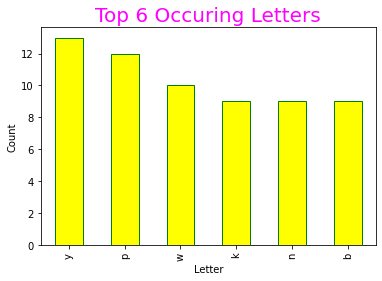

In [114]:
letters.value_counts().head(6).plot.bar(color='yellow',
                                       ec='green',
                                       width=.5)

plt.title('Top 6 Occuring Letters', size=20, color='magenta')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.tight_layout
plt.show()

## 5. Complete the exercises from https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a, but use pandas Series for the data structure instead of lists and use Series subsetting/indexing and vectorization options instead of loops and lists.

In [138]:
# 17 list comprehension problems in python

fruits = pd.Series(['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange'])

numbers = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9])

In [585]:
# Exercise 1 - rewrite the above example code using list comprehension syntax. 
#Make a variable named uppercased_fruits to hold the output of the list comprehension. 
#Output should be ['MANGO', 'KIWI', etc...]

uppercased_fruits = fruits.str.upper()

uppercased_fruits

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

In [430]:
# Exercise 2 - create a variable named capitalized_fruits and use list comprehension syntax to produce output 
#like ['Mango', 'Kiwi', 'Strawberry', etc...]
capitalized_fruits = fruits.str.capitalize()
capitalized_fruits


0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin orange
dtype: object

In [139]:
# Exercise 3 - Use a list comprehension to make a variable named fruits_with_more_than_two_vowels. 
#Hint: You'll need a way to check if something is a vowel.

fruits_with_more_than_two_vowels = fruits[fruits.str.count(r'[aeiou]') > 1]
fruits_with_more_than_two_vowels

0              mango
1               kiwi
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

In [140]:
# Exercise 4 - make a variable named fruits_with_only_two_vowels.
#The result should be ['mango', 'kiwi', 'strawberry']
fruits_with_two_vowels = fruits[fruits.str.count(r'[aeiou]') == 2]
fruits_with_two_vowels

0         mango
1          kiwi
2    strawberry
dtype: object

In [141]:
# Exercise 5 - make a list that contains each fruit with more than 5 characters
fruits[fruits.str.len() > 5]

2         strawberry
4          pineapple
5    mandarin orange
dtype: object

In [587]:
# Exercise 6 - make a list that contains each fruit with exactly 5 characters
fruits[fruits.str.len() == 5]

0    mango
3    guava
dtype: object

In [589]:
# Exercise 7 - Make a list that contains fruits that have less than 5 characters
fruits[fruits.str.len() < 5]

1    kiwi
dtype: object

In [142]:
# Exercise 8 - Make a list containing the number of characters in each fruit. 
#Output would be [5, 4, 10, etc... ]
fruits.str.len()

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

In [143]:
# Exercise 9 - Make a variable named fruits_with_letter_a that contains a 
#list of only the fruits that contain the letter "a"
fruits[fruits.str.contains('a')]

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

In [544]:
# Exercise 10 - Make a variable named even_numbers that holds only the even numbers 
even_numbers = numbers[numbers % 2 == 0]
even_numbers

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64

In [542]:
# Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers
odd_numbers = numbers[numbers % 2 != 0]
odd_numbers

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18     5
19    -9
dtype: int64

In [594]:
# Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers
positive_numbers = numbers[numbers > 0]
positive_numbers

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
18      5
dtype: int64

In [530]:
# Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers
negative_numbers = numbers[numbers < 0]
negative_numbers

15   -8
16   -4
17   -2
19   -9
dtype: int64

In [145]:
# Exercise 14 - use a list comprehension w/ a conditional in order to produce 
#a list of numbers with 2 or more numerals
numbers[numbers.apply(lambda n: (n > 9) or (n < -9))]

8      10
9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64

In [531]:
# Exercise 15 - Make a variable named numbers_squared that contains the 
#numbers list with each element squared. Output is [4, 9, 16, etc...]
numbers ** 2

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

In [540]:
# Exercise 16 - Make a variable named odd_negative_numbers that contains
#only the numbers that are both odd and negative.
numbers[(numbers % 2 != 0) & (numbers < 0)]

19   -9
dtype: int64

In [541]:
# Exercise 17 - Make a variable named numbers_plus_5. In it, 
#return a list containing each number plus five. 
numbers + 5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64